<a href="https://colab.research.google.com/github/saran2811/saran2811.github.io/blob/main/final_assignment_customer_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
df=pd.read_csv("/content/cust_data.xlsx - in.csv",index_col=0)
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

# $\color{blue}{\text{**Purchasing pattern**}}$

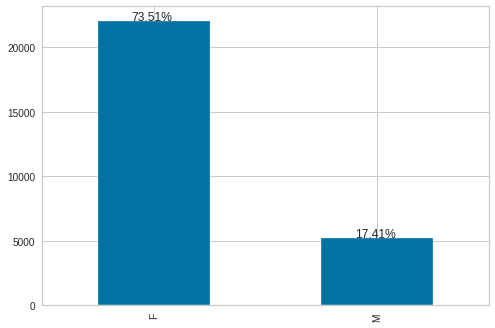

In [ ]:
df.Gender.value_counts().plot(kind='bar')
plt.text(x=-.1,y=df.Gender.value_counts()[0]+ 20, s=str(round((df.Gender.value_counts()[0])*100/len(df.Gender),2)) + '%')
plt.text(x=0.9,y=df.Gender.value_counts()[1]+ 20, s=str(round((df.Gender.value_counts()[1])*100/len(df.Gender),2)) + '%')
plt.show()

In [ ]:
df.Orders.value_counts()

0     7294
1     2716
2     2422
7     2207
3     2199
4     2192
8     2080
6     2039
5     2010
9     1993
10    1938
12     469
11     441
Name: Orders, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


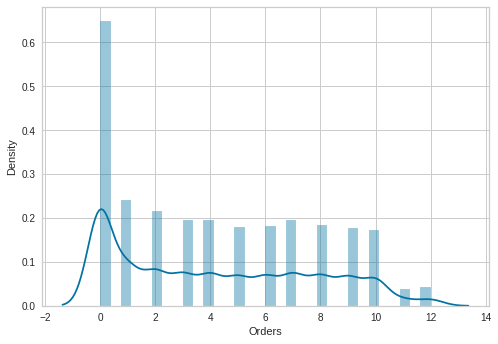

In [ ]:
sns.distplot(df['Orders'])

$\color{blue}{\text{Customer search profile has more 0 orders and orders are highly skewed.}}$

Text(3.8, 12.3, '12.0')

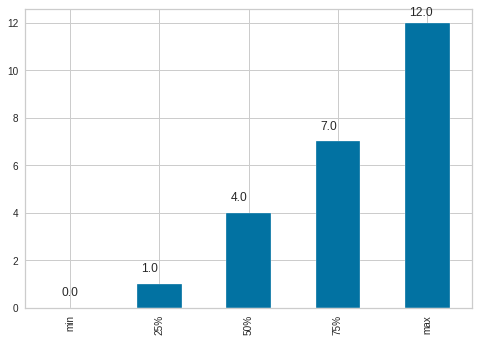

In [ ]:
df.Orders.describe()[3:].plot(kind='bar')
plt.text(x=-.1,y=df.Orders.describe()[3]+.5,s=str(df.Orders.describe()[3]))
plt.text(x=0.8,y=df.Orders.describe()[4]+.5,s=str(df.Orders.describe()[4]))
plt.text(x=1.8,y=df.Orders.describe()[5]+.5,s=str(df.Orders.describe()[5]))
plt.text(x=2.8,y=df.Orders.describe()[6]+.5,s=str(df.Orders.describe()[6]))
plt.text(x=3.8,y=df.Orders.describe()[7]+0.3,s=str(df.Orders.describe()[7]))

$\color{blue}{\text{Average order by the customers is 4}}$

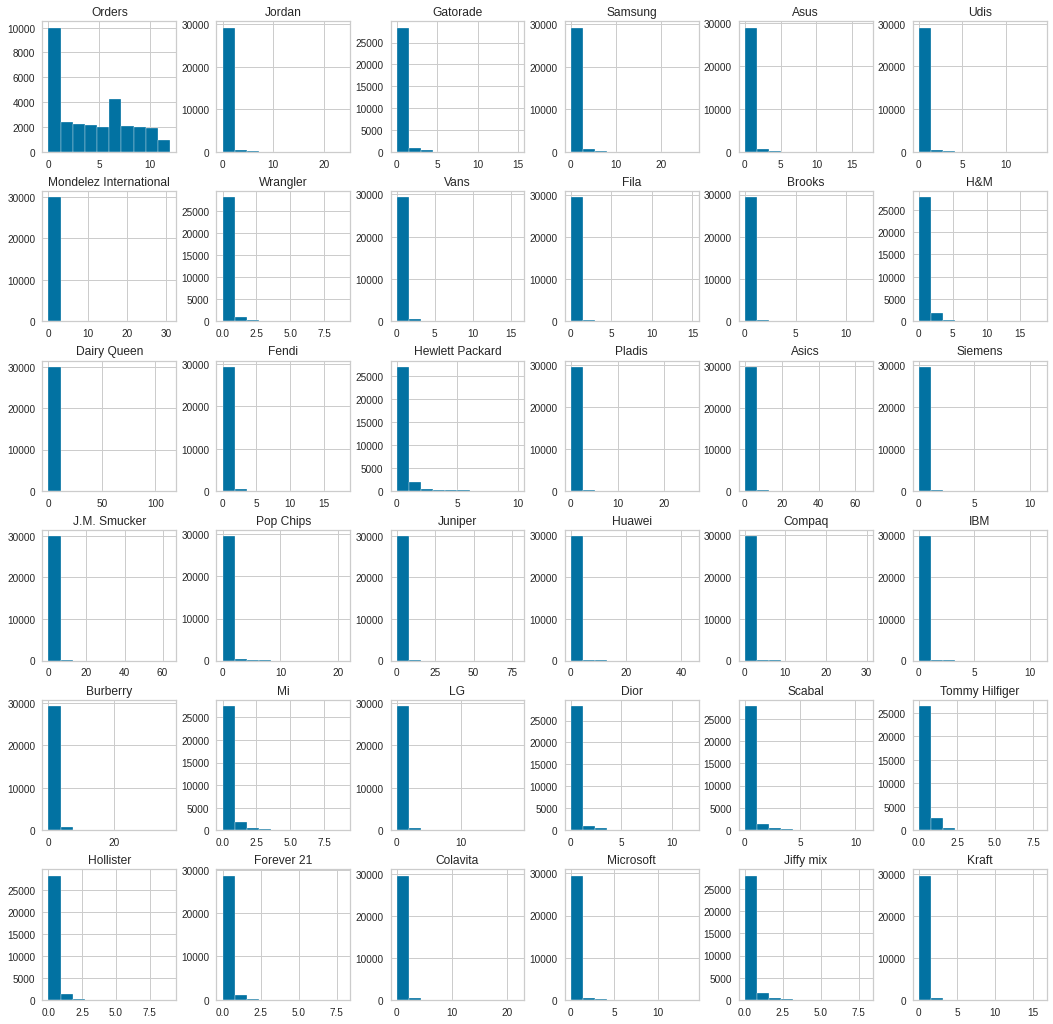

In [ ]:
fig=df.hist(figsize=(18,18))

$\color{blue}{\text{***Treating Missing values***}}$

Text(0.5, 1.0, 'Missing value')

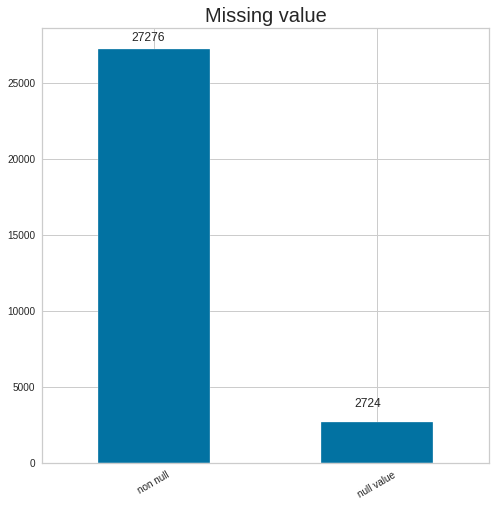

In [ ]:
fig=df.Gender.isna().value_counts().plot(kind='bar',figsize=(8,8))
x=np.arange(len(df.Gender.isna().value_counts()))
fig.set_xticklabels(['non null','null value'])
plt.xticks(rotation=30)
plt.text(x=-.1,y=df.Gender.isna().value_counts()[0]+500,s=str(df.Gender.isna().value_counts()[0]))
plt.text(x=0.9,y=df.Gender.isna().value_counts()[1]+1000,s=str(df.Gender.isna().value_counts()[1]))
plt.title("Missing value",fontsize=20)

**Percent of Gender missing value**

In [ ]:
df.Gender.isna().sum()/df.Gender.isna().count()*100

9.08

In [ ]:
df_1=pd.get_dummies(df,columns=['Gender'])
df_1

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Orders                  30000 non-null  int64
 1   Jordan                  30000 non-null  int64
 2   Gatorade                30000 non-null  int64
 3   Samsung                 30000 non-null  int64
 4   Asus                    30000 non-null  int64
 5   Udis                    30000 non-null  int64
 6   Mondelez International  30000 non-null  int64
 7   Wrangler                30000 non-null  int64
 8   Vans                    30000 non-null  int64
 9   Fila                    30000 non-null  int64
 10  Brooks                  30000 non-null  int64
 11  H&M                     30000 non-null  int64
 12  Dairy Queen             30000 non-null  int64
 13  Fendi                   30000 non-null  int64
 14  Hewlett Packard         30000 non-null  int64
 15  Pladis             

$\color{blue}{\text{*To cluster the customers lets consider the brand names to segment customers*}}$

lets drop Orders and Gender columns

In [ ]:
df_data=df_1.drop(['Orders','Gender_F','Gender_M'],axis=1)
df_data.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Normalizing**

In [ ]:
scale=StandardScaler()
df_data=scale.fit_transform(df_data)
df_data


array([[-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249,  1.05998399, -0.24298472, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [-0.33231249,  1.05998399, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.33231249, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 2.15288625, -0.35773869, -0.24298472, ..., -0.26057832,
        -0.22048554, -0.18277495]])

In [ ]:
df_1.columns

Index(['Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_F',
       'Gender_M'],
      dtype='object')

In [ ]:
df_scaled=pd.DataFrame(df_data,columns=df_1.columns[1:36])
df_scaled

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,1.824571,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


$\color{blue}{\text{*Buliding and training Model (K-MEANS)}}$

**Build a Model with multiple K**

In [ ]:
n_clusters=[4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_scaled)
    
    score=silhouette_score(df_scaled,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 4, silhouette score is 0.28882936660509584)
For n_clusters = 5, silhouette score is 0.27345077326442396)
For n_clusters = 6, silhouette score is 0.21945733520582925)
For n_clusters = 7, silhouette score is 0.20381188273491607)
For n_clusters = 8, silhouette score is 0.19969011593382976)


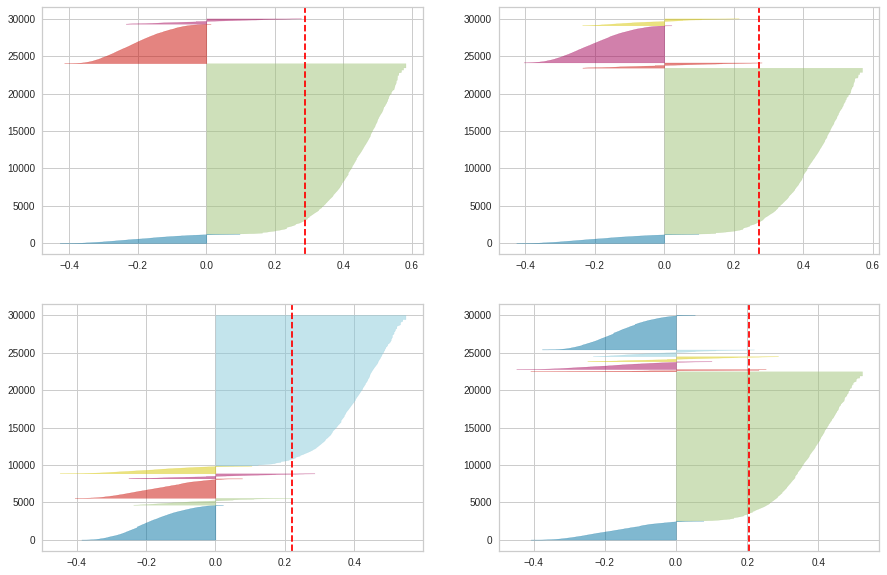

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in [4,5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i,random_state=10)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(df_scaled)

$\color{blue}{\text{Fig . Silhouette Analysis for 4, 5,6,7 Clusters}}$

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

* The value of n_clusters as 6 and 7 looks to be suboptimal for the given data due to the following reasons:

* Presence of clusters with below-average silhouette scores 
Wide fluctuations in the size of the silhouette plots.

* more silhoutte coeff near -1 indicate that the samples may have been assigned to the wrong cluster.

Hence with good silhoutte value 0.28882936660509584 Cluster value of four(k=4) can be choosen for futher consideration

Building Kmeans with 4 CLUSTER

In [ ]:
model=KMeans(n_clusters=4,random_state=10)
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=10)

Retrive the Clusters

In [ ]:
df_out=df_1.copy(deep=True)
df_out['Clusters']=model.labels_

In [ ]:
df_out

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Clusters
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
29997,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
29998,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


Text(2.9, 1001, '701')

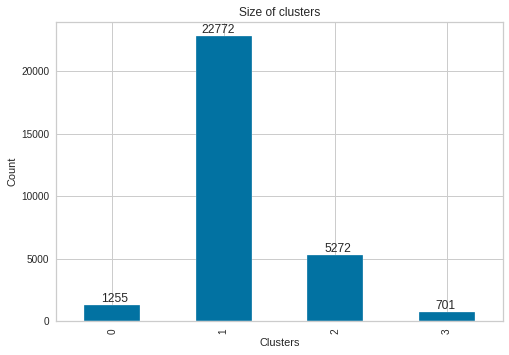

In [ ]:
df_out.Clusters.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Size of clusters')
plt.text(x=-0.1,y=df_out.Clusters.value_counts().sort_index()[0]+300,s=str(df_out.Clusters.value_counts().sort_index()[0]))
plt.text(x=.8,y=df_out.Clusters.value_counts().sort_index()[1]+300,s=str(df_out.Clusters.value_counts().sort_index()[1]))
plt.text(x=1.9,y=df_out.Clusters.value_counts().sort_index()[2]+300,s=str(df_out.Clusters.value_counts().sort_index()[2]))
plt.text(x=2.9,y=df_out.Clusters.value_counts().sort_index()[3]+300,s=str(df_out.Clusters.value_counts().sort_index()[3]))

**cluster center**

the cluster center gives informaion about the the variables belonging to the clusters

In [ ]:
model.cluster_centers_

array([[ 4.46911178e-01,  4.64653429e-01,  2.33811244e-01,
         1.58847333e-01,  1.02968719e-01,  2.53959954e-01,
         3.17850679e-01,  3.85553566e-01,  9.54756939e-02,
         8.08414956e-01,  6.25606966e-01,  1.90732942e+00,
         6.16518732e-01,  2.25042157e-01,  2.56836339e+00,
         3.65393893e-01, -2.42829838e-02,  1.20753505e+00,
         1.38641212e+00,  3.61136401e-01,  1.39218663e-01,
         1.06598510e-01,  3.27854109e-02,  2.55667114e+00,
         4.47053392e-01,  1.39635077e+00,  6.31866111e-01,
         2.90554110e-01,  1.13703040e+00,  3.35732789e-01,
         4.17015549e-01,  1.39134451e+00,  8.06428387e-01,
         1.57561955e+00,  1.92270241e+00],
       [-1.58476216e-01, -1.57536158e-01, -8.43805121e-02,
        -1.16933971e-01, -1.21152918e-01, -8.71548181e-02,
        -1.13422027e-01, -7.67861122e-02, -3.90164536e-02,
        -1.23451522e-01, -1.58799020e-01, -9.10241051e-02,
        -6.89922592e-02, -5.53048520e-02, -1.23491911e-01,
        -1.20

In [ ]:
center=pd.DataFrame(model.cluster_centers_,columns=df_out.columns[1:36])
center

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


$\color{blue}{\text{**CLUSTER 1**}}$

In [ ]:
cluster_1=sorted(zip(list(center.iloc[0,:]),list(center.columns)),reverse=True)

cluster_1

[(2.5683633928700207, 'Pladis'),
 (2.5566711435400533, 'Burberry'),
 (1.9227024096897427, 'Kraft'),
 (1.9073294208644698, 'Dairy Queen'),
 (1.575619545523192, 'Jiffy mix'),
 (1.3963507697171844, 'LG'),
 (1.3913445112503853, 'Colavita'),
 (1.3864121214217768, 'Pop Chips'),
 (1.207535047336853, 'J.M. Smucker'),
 (1.1370303957637249, 'Tommy Hilfiger'),
 (0.808414955776701, 'Brooks'),
 (0.8064283866062038, 'Microsoft'),
 (0.6318661107826062, 'Dior'),
 (0.6256069655338262, 'H&M'),
 (0.6165187317097829, 'Fendi'),
 (0.464653428527538, 'Gatorade'),
 (0.44705339200614186, 'Mi'),
 (0.44691117785298784, 'Jordan'),
 (0.4170155489000262, 'Forever 21'),
 (0.3855535656790602, 'Vans'),
 (0.36539389307680614, 'Asics'),
 (0.36113640079871207, 'Juniper'),
 (0.3357327890177173, 'Hollister'),
 (0.3178506792193073, 'Wrangler'),
 (0.2905541095915469, 'Scabal'),
 (0.2539599538470471, 'Mondelez International'),
 (0.23381124432255956, 'Samsung'),
 (0.22504215703362512, 'Hewlett Packard'),
 (0.15884733314335833,

In [ ]:
cl_1=df_out[df_out.Clusters==0].reset_index()

In [ ]:
cl_1.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Clusters
0,5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,28,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,1,0
2,40,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,58,5,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,2,0,1,0
4,63,5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
cl_1.Cust_ID.count()

1255

$\color{blue}{\text{First cluster has exactly 1255 cutomer segmented in to a group which mainly looks aligned towards the Groceries.}}$

$\color{blue}{\text{CLUSTER 2}}$

In [ ]:
cluster_2=sorted(zip(list(center.iloc[1,:]),list(center.columns)),reverse=True)

cluster_2

[(-0.017300283220996093, 'IBM'),
 (-0.03901645356307062, 'Fila'),
 (-0.055304851992874375, 'Hewlett Packard'),
 (-0.05631154842238818, 'Compaq'),
 (-0.06899225921253258, 'Fendi'),
 (-0.06899895112799385, 'Microsoft'),
 (-0.07649272672741791, 'Colavita'),
 (-0.0767861121872721, 'Vans'),
 (-0.07932113224858964, 'Jiffy mix'),
 (-0.0827404232942301, 'Kraft'),
 (-0.08438051210728387, 'Samsung'),
 (-0.08715481805768399, 'Mondelez International'),
 (-0.08791577919409048, 'Juniper'),
 (-0.08816036474694156, 'LG'),
 (-0.09102410506999421, 'Dairy Queen'),
 (-0.09477196150539502, 'Mi'),
 (-0.09514119428454898, 'Pop Chips'),
 (-0.11261805452218333, 'J.M. Smucker'),
 (-0.1134220267271726, 'Wrangler'),
 (-0.11416112673628302, 'Siemens'),
 (-0.11693397124155268, 'Asus'),
 (-0.1203991726340888, 'Asics'),
 (-0.12115291802759706, 'Udis'),
 (-0.12345152170926463, 'Brooks'),
 (-0.12349191074195755, 'Pladis'),
 (-0.126186616782663, 'Huawei'),
 (-0.14176461443515143, 'Forever 21'),
 (-0.14225286549196317, '

In [ ]:
cl_2=df_out[df_out.Clusters==1].reset_index()
cl_2.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Clusters
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,1
1,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,6,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,8,9,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
cl_2.Cust_ID.count()

22772

$\color{blue}{\text{Its the largest cluster containing 22772 customers mainly focussed on IT and electronics.}}$

$\color{blue}{\text{CLUSTER 3}}$

In [ ]:
cluster_3=sorted(zip(list(center.iloc[2,:]),list(center.columns)),reverse=True)

cluster_3

[(0.7701757489709979, 'Scabal'),
 (0.5948559923975795, 'Jordan'),
 (0.5869420849637125, 'Hollister'),
 (0.5699901524200979, 'Gatorade'),
 (0.5655013593708393, 'Dior'),
 (0.5438465382729089, 'H&M'),
 (0.53583978750718, 'Forever 21'),
 (0.5113016084652766, 'Udis'),
 (0.5044601305848015, 'Huawei'),
 (0.4744591715429245, 'Asus'),
 (0.43060930924323937, 'Wrangler'),
 (0.35861761671508535, 'Brooks'),
 (0.35072835932613067, 'Tommy Hilfiger'),
 (0.32424974954306834, 'Samsung'),
 (0.31487755995613076, 'Mondelez International'),
 (0.2980871649377366, 'Mi'),
 (0.2854037508410769, 'Juniper'),
 (0.2571154270717416, 'Vans'),
 (0.2142743807487263, 'Compaq'),
 (0.2061562446686961, 'Burberry'),
 (0.19952618412986403, 'Hewlett Packard'),
 (0.15383568391016386, 'Fendi'),
 (0.1494109504435032, 'J.M. Smucker'),
 (0.14507325877050548, 'Fila'),
 (0.1049066159450008, 'Microsoft'),
 (0.06736028111888656, 'IBM'),
 (0.06541809755355946, 'Pop Chips'),
 (0.06186809419163776, 'LG'),
 (0.0036891560229100526, 'Colavi

In [ ]:
cl_3=df_out[df_out.Clusters==2].reset_index()
cl_3.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Clusters
0,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
1,7,6,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,2
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,20,4,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,2
4,21,9,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,1,0,2


In [ ]:
cl_3.Cust_ID.count()

5272

$\color{blue}{\text{Its the second largest cluster containing 5272 customers focused on Textile and Apparels}}$

$\color{blue}{\text{CLUSTER 4}}$

In [ ]:
cluster_4=sorted(zip(list(center.iloc[3,:]),list(center.columns)),reverse=True)

cluster_4

[(4.612421213336683, 'Siemens'),
 (3.757106120080634, 'Asics'),
 (0.3762419165162781, 'J.M. Smucker'),
 (0.11864320568860025, 'Pop Chips'),
 (0.06776496739127584, 'Juniper'),
 (0.06414297821158868, 'Huawei'),
 (0.041533950099074096, 'Mi'),
 (0.030422522349300617, 'Compaq'),
 (0.01362848793884517, 'Mondelez International'),
 (0.010947162250401665, 'Microsoft'),
 (0.008320946721358573, 'Gatorade'),
 (0.007833483448154715, 'Fila'),
 (-0.0022041343329872246, 'IBM'),
 (-0.01662704079083483, 'Fendi'),
 (-0.032771158617395185, 'Colavita'),
 (-0.04251155371181862, 'H&M'),
 (-0.04592578180397959, 'Tommy Hilfiger'),
 (-0.04644682463756234, 'Asus'),
 (-0.07413683604647651, 'Scabal'),
 (-0.0775889254818175, 'Dairy Queen'),
 (-0.08113395396379812, 'Pladis'),
 (-0.08574769893408113, 'Burberry'),
 (-0.08590796304338688, 'Udis'),
 (-0.08829003820363267, 'Jiffy mix'),
 (-0.09819250020138565, 'Kraft'),
 (-0.09935909618510513, 'LG'),
 (-0.1036153793190349, 'Hewlett Packard'),
 (-0.11082324843649942, 'Sam

In [ ]:
cl_4=df_out[df_out.Clusters==3].reset_index()
cl_4.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Clusters
0,52,10,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1,3
1,57,8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
2,114,8,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
3,141,4,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,142,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3


In [ ]:
cl_4.Cust_ID.count()

701

$\color{blue}{\text{It's the last meagre customers of 701 cotains the basket of all items not a particular section.}}$

$\color{RED}{\text{CONCLUSION REPORT:}}$



*   By means ok KMeans Model we have segmented the customers into four(4) clusters who searched for particular segment of brands in the ecommerce websites.

*   We have segmented customers into following clusters:

             *  Groceries
             *  IT and Electronics
             *  Textile and Apparels
             *  Basket of Brands


*   These clusters give the information about the interest of the customer in the different brands.


*   The above clustered predictions can be useful for ecommerce companies to recommend products to customer in future to develop the business further.


